In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath = '/content/drive/MyDrive/Colab Notebooks/'

In [3]:
import pandas as pd
import numpy as np
import os

from keras.models import Sequential, load_model                    
from keras.layers.core import Dense, Activation 
from keras.utils import np_utils   

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# DATASET

In [4]:
#import the dataset
data = pd.read_csv(filepath + "fetal_health.csv")

n = data.shape[0]
p = data.shape[1]
data.shape 

(2126, 22)

In [5]:
#data inspection
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [6]:
#NA checking
for col in data.columns:
  na_sum = data[col].isna()
  #print(sum(na_sum))

#there are no missing values

In [7]:
#features and response
X = data.iloc[:,0:p-1]
y = data.iloc[:,-1]

#rescale y to start from 0
y = y-1 

In [8]:
#UNDERSAMPLING ?!

In [9]:
#creating training and test sets

#NB: stratify tries to ensure a proportional distribution of labels among train and test set
xTrain, xTest, yTrain, yTest = train_test_split( 
    X, y,
    test_size=0.25, 
    random_state=0, 
    stratify = y) 

In [10]:
#see the splitting results
A = np.unique(yTrain, return_counts=True)
B = np.unique(yTest, return_counts=True)

print('class frequencies in training set:', A[1],
      '\nclass frequencies in test set:',B[1])
print('class frequencies in training set:', A[1]/yTrain.shape[0],
      '\nclass frequencies in test set:',B[1]/yTest.shape[0])

class frequencies in training set: [1241  221  132] 
class frequencies in test set: [414  74  44]
class frequencies in training set: [0.77854454 0.13864492 0.08281054] 
class frequencies in test set: [0.77819549 0.13909774 0.08270677]


In [11]:
#saving test classes for later
y_classes = yTest

In [12]:
#one-hot-encoding for the response variable
yTrain = np_utils.to_categorical(yTrain,3)
yTest = np_utils.to_categorical(yTest,3)

# MODEL

## basic Neural Network

bouilding a 3 layer fully connected neural network

In [13]:
model = Sequential()

#input + hidden layer
model.add(Dense(10,input_shape=(p-1,),activation='relu'))

#output
model.add(Dense(3,activation='softmax'))

# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

In [14]:
# Summarize the built model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [16]:
# model fitting
history = model.fit(xTrain, yTrain,
                    validation_data = (xTest,yTest),
                    epochs=20,verbose=0)

In [17]:
#model evaluation
model.evaluate(xTest,yTest)

17/17 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.7782


[0.6779026389122009, 0.7781955003738403]

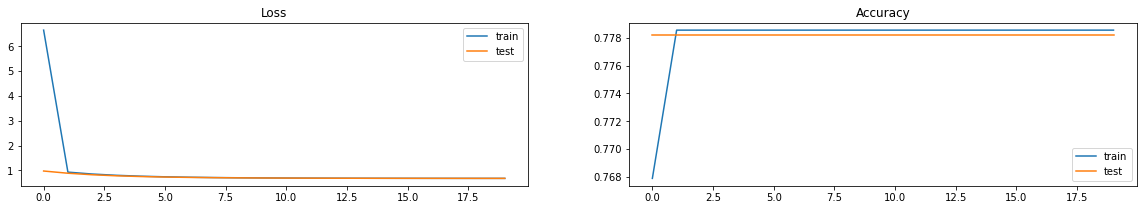

In [18]:
plt.figure(figsize=(20,3))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

other metrics apart from loss and accuracy

In [19]:
# predict probabilities 
yhat_probs = model.predict(xTest, verbose=0)
# predicted classes
yhat_classes = np.argmax(yhat_probs, axis=-1)

# confusion matrix
matrix = confusion_matrix(y_classes, yhat_classes,labels= np.unique(yhat_classes))
print('transposed Confusion Matrix:\n',matrix)

# classification report
print('\nClassification report:')
print(classification_report(y_classes, yhat_classes,zero_division=0))

transposed Confusion Matrix:
 [[414]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       414
         1.0       0.00      0.00      0.00        74
         2.0       0.00      0.00      0.00        44

    accuracy                           0.78       532
   macro avg       0.26      0.33      0.29       532
weighted avg       0.61      0.78      0.68       532



## repeated estimation

In [20]:
#utilities
best_acc = 0
model_list = []

acc_list = []
confusion_list = []
report_list = []

#------------------------#
for i in range(0,100):

  #model
  model = Sequential()
  model.add(Dense(10,input_shape=(p-1,),activation='relu'))
  model.add(Dense(3,activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
  model.fit(xTrain, yTrain,verbose=0)
  score = model.evaluate(xTest,yTest,verbose=0)

  model_list.append(model)
  acc_list.append(score[1])

  if score[1] > best_acc: 
    best_acc = score[1]
    best_model = model

  yhat_probs = model.predict(xTest, verbose=0)
  yhat_classes = np.argmax(yhat_probs, axis=-1)

  # confusion matrix
  matrix = confusion_matrix(y_classes, yhat_classes,labels= np.unique(yhat_classes))
  confusion_list.append(matrix)

  # classification report
  report = classification_report(y_classes, yhat_classes,zero_division = 0)
  report_list.append(report)

**check results**

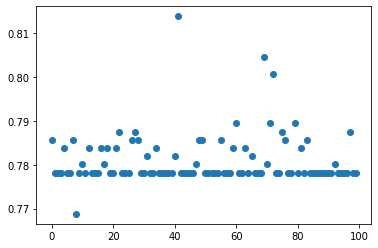

In [21]:
#accuracy plot 
plt.plot(acc_list,'o')

In [22]:
#all confusion matrix obtained

#for m in confusion_list:
#  print(m,'\n')

In [23]:
#all reports obtained

#for r in report_list:
# print(r,'\n')

**best model saving**

In [24]:
#code to save the best model, to use only when a best model is obtained
modelFileName='best_model_SGD.h5'

if not os.path.exists(filepath+modelFileName):
  best_model.save(filepath+modelFileName)
  print('Model saved')
else:
  print('File already existing ')

Model saved


## optimized neural network

trying various adaptive optimizers instead of the stochastic gradient descent aòlgorithm


1. ADAGRAD

In [25]:
#utilities
best_acc = 0
model_list = []

acc_list = []
confusion_list = []
report_list = []

#------------------------#
for i in range(0,100):

  #model
  model = Sequential()
  model.add(Dense(10,input_shape=(p-1,),activation='relu'))
  model.add(Dense(3,activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
  model.fit(xTrain, yTrain,verbose=0)
  score = model.evaluate(xTest,yTest,verbose=0)

  model_list.append(model)
  acc_list.append(score[1])

  if score[1] > best_acc: 
    best_acc = score[1]
    best_model = model

  yhat_probs = model.predict(xTest, verbose=0)
  yhat_classes = np.argmax(yhat_probs, axis=-1)

  # confusion matrix
  matrix = confusion_matrix(y_classes, yhat_classes,labels= np.unique(yhat_classes))
  confusion_list.append(matrix)

  # classification report
  report = classification_report(y_classes, yhat_classes,zero_division = 0)
  report_list.append(report)

In [26]:
#code to save the best model, to use only when a best model is obtained
modelFileName='best_model_AdaG.h5'

if not os.path.exists(filepath+modelFileName):
  best_model.save(filepath+modelFileName)
  print('Model saved')
else:
  print('File already existing ')

Model saved


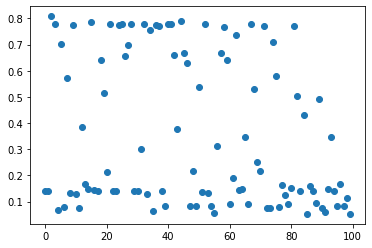

In [27]:
#accuracy plot 
plt.plot(acc_list,'o')

2. RMSprop

It is very similar to Adadelta. The only difference is in the way they manage the past gradients.

In [28]:
#utilities
best_acc = 0
model_list = []

acc_list = []
confusion_list = []
report_list = []

#------------------------#
for i in range(0,100):

  #model
  model = Sequential()
  model.add(Dense(10,input_shape=(p-1,),activation='relu'))
  model.add(Dense(3,activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  model.fit(xTrain, yTrain,verbose=0)
  score = model.evaluate(xTest,yTest,verbose=0)

  model_list.append(model)
  acc_list.append(score[1])

  if score[1] > best_acc: 
    best_acc = score[1]
    best_model = model

  yhat_probs = model.predict(xTest, verbose=0)
  yhat_classes = np.argmax(yhat_probs, axis=-1)

  # confusion matrix
  matrix = confusion_matrix(y_classes, yhat_classes,labels= np.unique(yhat_classes))
  confusion_list.append(matrix)

  # classification report
  report = classification_report(y_classes, yhat_classes,zero_division = 0)
  report_list.append(report)

In [29]:
#code to save the best model, to use only when a best model is obtained
modelFileName='best_model_RMSP.h5'

if not os.path.exists(filepath+modelFileName):
  best_model.save(filepath+modelFileName)
  print('Model saved')
else:
  print('File already existing ')

Model saved


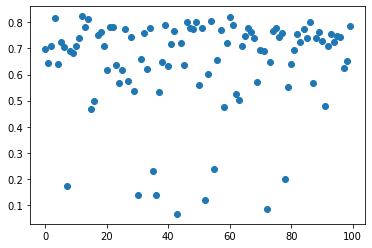

In [30]:
#accuracy plot 
plt.plot(acc_list,'o')

3. ADAM 

It adds to the advantages of Adadelta and RMSprop, the storing of an exponentially decaying average of past gradients similar to momentum.

In [31]:
#utilities
best_acc = 0
model_list = []

acc_list = []
confusion_list = []
report_list = []

#------------------------#
for i in range(0,100):

  #model
  model = Sequential()
  model.add(Dense(10,input_shape=(p-1,),activation='relu'))
  model.add(Dense(3,activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(xTrain, yTrain,verbose=0)
  score = model.evaluate(xTest,yTest,verbose=0)

  model_list.append(model)
  acc_list.append(score[1])

  if score[1] > best_acc: 
    best_acc = score[1]
    best_model = model

  yhat_probs = model.predict(xTest, verbose=0)
  yhat_classes = np.argmax(yhat_probs, axis=-1)

  # confusion matrix
  matrix = confusion_matrix(y_classes, yhat_classes,labels= np.unique(yhat_classes))
  confusion_list.append(matrix)

  # classification report
  report = classification_report(y_classes, yhat_classes,zero_division = 0)
  report_list.append(report)

In [32]:
#code to save the best model, to use only when a best model is obtained
modelFileName='best_model_AdaM.h5'

if not os.path.exists(filepath+modelFileName):
  best_model.save(filepath+modelFileName)
  print('Model saved')
else:
  print('File already existing ')

Model saved


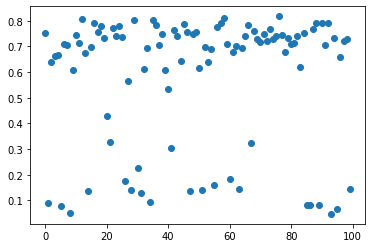

In [33]:
#accuracy plot 
plt.plot(acc_list,'o')

# BEST MODEL COMPARISON

In [34]:
#importing the previously saved best models
best_model_SGD = load_model(filepath + 'best_model_SGD.h5')
best_model_AdaG = load_model(filepath + 'best_model_AdaG.h5')
best_model_RMSP = load_model(filepath + 'best_model_RMSP.h5')
best_model_AdaM = load_model(filepath + 'best_model_AdaM.h5')

In [35]:
best_list = [best_model_SGD, best_model_AdaG, best_model_RMSP, best_model_AdaM]

ACCURACY

In [36]:
print('the best model accuracies are:\n')

for el in best_list:
  print(round(el.evaluate(xTest,yTest,verbose=0)[1], 3),'\n')

the best model accuracies are:

0.814 

0.808 

0.823 

0.818 



CONFUSION MATRIX + CLASSIFICATION REPORT

In [37]:
for n,el in enumerate(best_list):
  print('____________________________________________________')
  print(f'given the model {n+1}, we have the confusion matrix:\n')
  yhat_probs = el.predict(xTest, verbose=0)
  yhat_classes = np.argmax(yhat_probs, axis=-1)

  # confusion matrix
  print(confusion_matrix(y_classes, yhat_classes,labels= np.unique(yhat_classes)),'\n')

  # classification report
  print('and a classification report:\n')
  print(classification_report(y_classes, yhat_classes,zero_division = 0))


____________________________________________________
given the model 1, we have the confusion matrix:

[[407   7]
 [ 18  26]] 

and a classification report:

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       414
         1.0       0.00      0.00      0.00        74
         2.0       0.79      0.59      0.68        44

    accuracy                           0.81       532
   macro avg       0.53      0.52      0.52       532
weighted avg       0.70      0.81      0.75       532

____________________________________________________
given the model 2, we have the confusion matrix:

[[369  30  15]
 [ 19  45  10]
 [ 15  13  16]] 

and a classification report:

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       414
         1.0       0.51      0.61      0.56        74
         2.0       0.39      0.36      0.38        44

    accuracy                           0.81       532
   macro